In [ ]:
Name:Pragna Chelsiya
GIthub:https://github.com/PragnaChelsiya/Telecom-Customer-Churn-Dataset.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [27]:
data = pd.read_csv(r"C:\Users\user\Downloads\churn-bigml-20.csv")

In [29]:
data

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,LA,117,408,No,No,0,184.5,97,31.37,351.6,80,29.89,215.8,90,9.71,8.7,4,2.35,1,False
1,IN,65,415,No,No,0,129.1,137,21.95,228.5,83,19.42,208.8,111,9.40,12.7,6,3.43,4,True
2,NY,161,415,No,No,0,332.9,67,56.59,317.8,97,27.01,160.6,128,7.23,5.4,9,1.46,4,True
3,SC,111,415,No,No,0,110.4,103,18.77,137.3,102,11.67,189.6,105,8.53,7.7,6,2.08,2,False
4,HI,49,510,No,No,0,119.3,117,20.28,215.1,109,18.28,178.7,90,8.04,11.1,1,3.00,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
662,WI,114,415,No,Yes,26,137.1,88,23.31,155.7,125,13.23,247.6,94,11.14,11.5,7,3.11,2,False
663,AL,106,408,No,Yes,29,83.6,131,14.21,203.9,131,17.33,229.5,73,10.33,8.1,3,2.19,1,False
664,VT,60,415,No,No,0,193.9,118,32.96,85.0,110,7.23,210.1,134,9.45,13.2,8,3.56,3,False
665,WV,159,415,No,No,0,169.8,114,28.87,197.7,105,16.80,193.7,82,8.72,11.6,4,3.13,1,False


In [31]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 667 entries, 0 to 666
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   667 non-null    object 
 1   Account length          667 non-null    int64  
 2   Area code               667 non-null    int64  
 3   International plan      667 non-null    object 
 4   Voice mail plan         667 non-null    object 
 5   Number vmail messages   667 non-null    int64  
 6   Total day minutes       667 non-null    float64
 7   Total day calls         667 non-null    int64  
 8   Total day charge        667 non-null    float64
 9   Total eve minutes       667 non-null    float64
 10  Total eve calls         667 non-null    int64  
 11  Total eve charge        667 non-null    float64
 12  Total night minutes     667 non-null    float64
 13  Total night calls       667 non-null    int64  
 14  Total night charge      667 non-null    fl

In [33]:
data.describe()

,Account length,Area code,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls
count,667.000000,667.000000,667.000000,667.000000,667.000000,667.000000,667.000000,667.000000,667.000000,667.000000,667.000000,667.000000,667.000000,667.000000,667.000000,667.000000
mean,102.841079,436.157421,8.407796,180.948126,100.937031,30.761769,203.355322,100.476762,17.285262,199.685307,100.113943,8.985907,10.238381,4.527736,2.764948,1.563718
std,40.819480,41.783305,13.994480,55.508628,20.396790,9.436463,49.719268,18.948262,4.226160,49.759931,20.172505,2.239429,2.807850,2.482442,0.758167,1.333357
min,1.000000,408.000000,0.000000,25.900000,30.000000,4.400000,48.100000,37.000000,4.090000,23.200000,42.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,76.000000,408.000000,0.000000,146.250000,87.500000,24.860000,171.050000,88.000000,14.540000,167.950000,86.000000,7.560000,8.600000,3.000000,2.320000,1.000000
50%,102.000000,415.000000,0.000000,178.300000,101.000000,30.310000,203.700000,101.000000,17.310000,201.600000,100.000000,9.070000,10.500000,4.000000,2.840000,1.000000
75%,128.000000,415.000000,20.000000,220.700000,115.000000,37.520000,236.450000,113.000000,20.095000,231.500000,113.500000,10.420000,12.050000,6.000000,3.255000,2.000000
max,232.000000,510.000000,51.000000,334.300000,165.000000,56.830000,361.800000,168.000000,30.750000,367.700000,175.000000,16.550000,18.300000,18.000000,4.940000,8.000000


In [35]:
data.isnull().sum()

State                     0
Account length            0
Area code                 0
International plan        0
Voice mail plan           0
Number vmail messages     0
Total day minutes         0
Total day calls           0
Total day charge          0
Total eve minutes         0
Total eve calls           0
Total eve charge          0
Total night minutes       0
Total night calls         0
Total night charge        0
Total intl minutes        0
Total intl calls          0
Total intl charge         0
Customer service calls    0
Churn                     0
dtype: int64

In [55]:
data_cleaned = data.dropna()  # Remove rows with missing values
print("After dropping rows, dataset shape:", data_cleaned.shape)

After dropping rows, dataset shape: (0, 20)


In [57]:
# Fill numerical missing values with the column mean
data.fillna(data.mean(), inplace=True)
print("Missing values after filling:\n", data.isnull().sum())

Missing values after filling:
 State                       0
Account length              0
Area code                   0
International plan        667
Voice mail plan           667
Number vmail messages       0
Total day minutes           0
Total day calls             0
Total day charge            0
Total eve minutes           0
Total eve calls             0
Total eve charge            0
Total night minutes         0
Total night calls           0
Total night charge          0
Total intl minutes          0
Total intl calls            0
Total intl charge           0
Customer service calls      0
Churn                       0
dtype: int64


In [104]:
import pandas as pd

# Convert back to DataFrame with proper column names
X_train = pd.DataFrame(X_train, columns=data.drop(columns=['Churn']).columns)
X_test = pd.DataFrame(X_test, columns=data.drop(columns=['Churn']).columns)

print(X_train.isnull().sum())
print(X_test.isnull().sum())

# Fill missing values in numerical columns with mean
X_train = X_train.fillna(X_train.mean())
X_test = X_test.fillna(X_test.mean())

# Fill missing values in categorical columns with mode
X_train = X_train.fillna(X_train.mode().iloc[0])
X_test = X_test.fillna(X_test.mode().iloc[0])

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Train Logistic Regression model
model = LogisticRegression(random_state=42, max_iter=1000)
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print(f"Model Accuracy: {accuracy:.4f}")



State                     0
Account length            0
Area code                 0
International plan        0
Voice mail plan           0
Number vmail messages     0
Total day minutes         0
Total day calls           0
Total day charge          0
Total eve minutes         0
Total eve calls           0
Total eve charge          0
Total night minutes       0
Total night calls         0
Total night charge        0
Total intl minutes        0
Total intl calls          0
Total intl charge         0
Customer service calls    0
dtype: int64
State                     0
Account length            0
Area code                 0
International plan        0
Voice mail plan           0
Number vmail messages     0
Total day minutes         0
Total day calls           0
Total day charge          0
Total eve minutes         0
Total eve calls           0
Total eve charge          0
Total night minutes       0
Total night calls         0
Total night charge        0
Total intl minutes        0
Total i

IndexError: single positional indexer is out-of-bounds

In [61]:
data['International plan'] = data['International plan'].map({'Yes': 1, 'No': 0})
data['Voice mail plan'] = data['Voice mail plan'].map({'Yes': 1, 'No': 0})

# Encode 'Churn' (True/False → 1/0)
data['Churn'] = data['Churn'].astype(int)

# Encode 'State' using Label Encoding
label_enc = LabelEncoder()
data['State'] = label_enc.fit_transform(data['State'])  # Convert state names to numbers


print(data)

     State  Account length  Area code  International plan  Voice mail plan  \
0       18        0.347127        408                 NaN              NaN   
1       15       -0.927731        415                 NaN              NaN   
2       34        1.425853        415                 NaN              NaN   
3       40        0.200028        415                 NaN              NaN   
4       11       -1.319994        510                 NaN              NaN   
..     ...             ...        ...                 ...              ...   
662     48        0.273578        415                 NaN              NaN   
663      1        0.077446        408                 NaN              NaN   
664     46       -1.050313        415                 NaN              NaN   
665     49        1.376820        415                 NaN              NaN   
666      6        1.989732        510                 NaN              NaN   

     Number vmail messages  Total day minutes  Total day calls 

In [63]:
# Encode categorical variables (from previous step)
data['International plan'] = data['International plan'].map({'Yes': 1, 'No': 0})
data['Voice mail plan'] = data['Voice mail plan'].map({'Yes': 1, 'No': 0})
data['Churn'] = data['Churn'].astype(int)

# Label encode 'State'
from sklearn.preprocessing import LabelEncoder
label_enc = LabelEncoder()
data['State'] = label_enc.fit_transform(data['State'])

# Identify numerical columns for standardization
num_cols = ['Account length', 'Number vmail messages', 'Total day minutes', 
            'Total day calls', 'Total day charge', 'Total eve minutes', 
            'Total eve calls', 'Total eve charge', 'Total night minutes', 
            'Total night calls', 'Total night charge', 'Total intl minutes', 
            'Total intl calls', 'Total intl charge', 'Customer service calls']

# Apply StandardScaler
scaler = StandardScaler()
data[num_cols] = scaler.fit_transform(data[num_cols])


print(data)

     State  Account length  Area code  International plan  Voice mail plan  \
0       18        0.347127        408                 NaN              NaN   
1       15       -0.927731        415                 NaN              NaN   
2       34        1.425853        415                 NaN              NaN   
3       40        0.200028        415                 NaN              NaN   
4       11       -1.319994        510                 NaN              NaN   
..     ...             ...        ...                 ...              ...   
662     48        0.273578        415                 NaN              NaN   
663      1        0.077446        408                 NaN              NaN   
664     46       -1.050313        415                 NaN              NaN   
665     49        1.376820        415                 NaN              NaN   
666      6        1.989732        510                 NaN              NaN   

     Number vmail messages  Total day minutes  Total day calls 

In [65]:
# Count unique values in categorical variables
print("\nValue Counts for Categorical Columns:\n")
print("International Plan:\n", data['International plan'].value_counts())
print("\nVoice Mail Plan:\n", data['Voice mail plan'].value_counts())
print("\nChurn:\n", data['Churn'].value_counts())



Value Counts for Categorical Columns:

International Plan:
 Series([], Name: count, dtype: int64)

Voice Mail Plan:
 Series([], Name: count, dtype: int64)

Churn:
 Churn
0    572
1     95
Name: count, dtype: int64


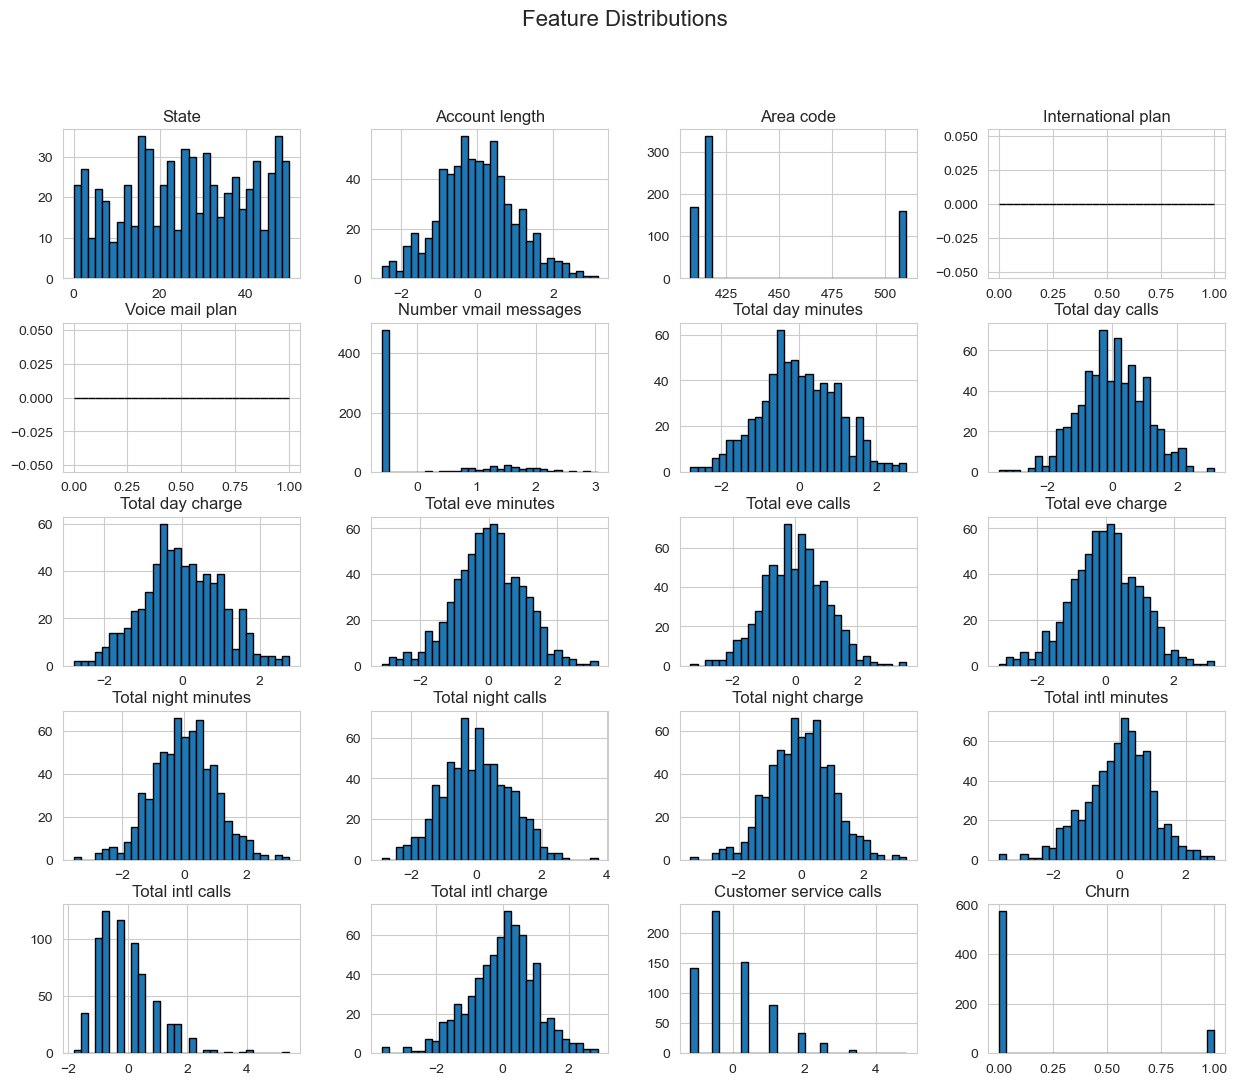

In [67]:
# Set the style
sns.set_style("whitegrid")

# Plot histograms
data.hist(figsize=(15, 12), bins=30, edgecolor="black")
plt.suptitle("Feature Distributions", fontsize=16)
plt.show()

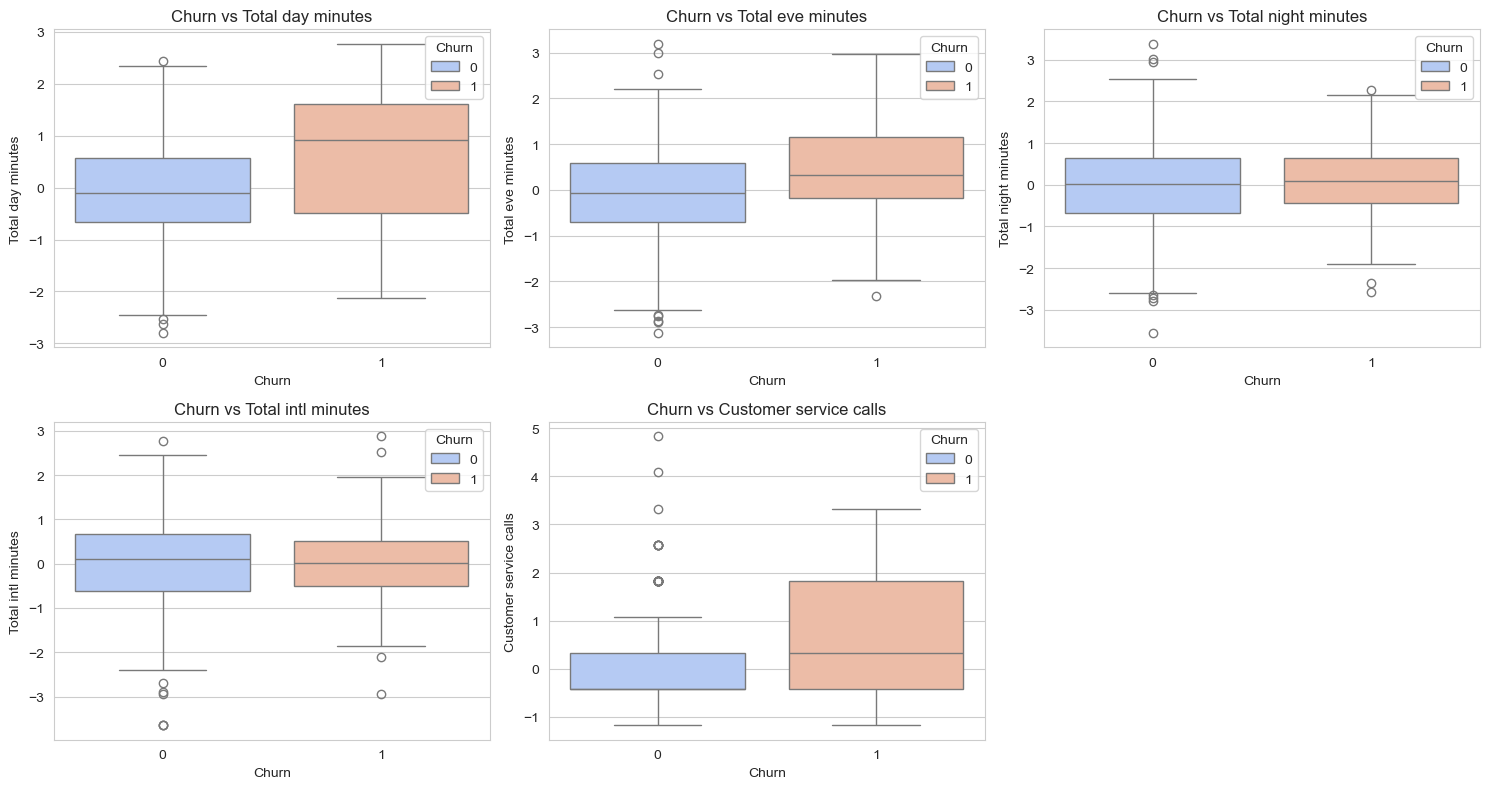

In [71]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define numerical columns for box plots
num_cols = ['Total day minutes', 'Total eve minutes', 'Total night minutes', 
            'Total intl minutes', 'Customer service calls']

# Create box plots
plt.figure(figsize=(15, 8))
for i, col in enumerate(num_cols, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(x="Churn", y=col, data=data, hue="Churn", palette="coolwarm", dodge=False)
    plt.title(f"Churn vs {col}")

plt.tight_layout()
plt.show()

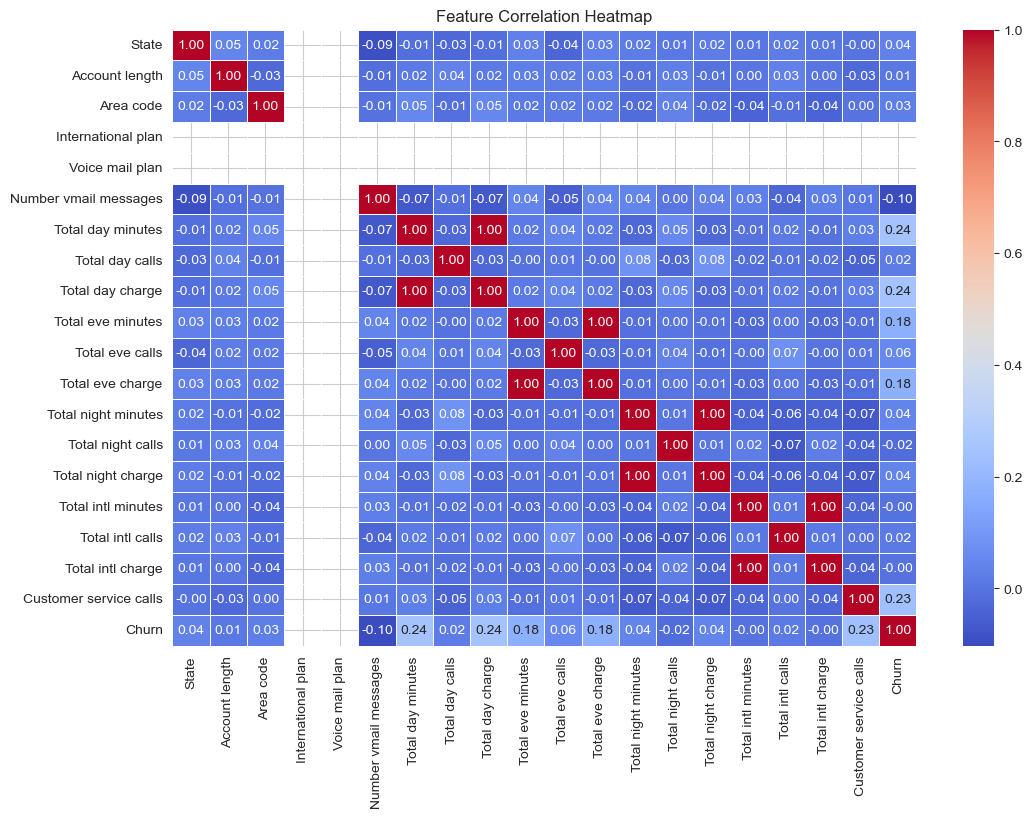

In [73]:
# Compute correlation matrix
plt.figure(figsize=(12, 8))
corr_matrix = data.corr()

# Generate heatmap
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()


In [75]:
# Separate features and target variable
X = data.drop(columns=['Churn'])  # Independent variables
y = data['Churn']  # Target variable

# Split into 80% train and 20% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Display the shape of the datasets
print(f"Training Set: X_train = {X_train.shape}, y_train = {y_train.shape}")
print(f"Testing Set: X_test = {X_test.shape}, y_test = {y_test.shape}")

Training Set: X_train = (533, 19), y_train = (533,)
Testing Set: X_test = (134, 19), y_test = (134,)
